In [7]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle
import seaborn as sbn
sbn.set_style("whitegrid")

In [8]:
CKPTDIR = '/data/krishna/research/results/linear/lambd_{:.6f}_pdim_{}'
data = {}
results = {}
lambd = [1e-4, 1e-3, 1e-2, 1e-1, 1]
pdim = [256, 512, 1024, 2048, 4096, 8192]
for l in lambd:
    for p in pdim:
        results[(l, p)] =  CKPTDIR.format(l, p) 

for params, path in results.items():
    fname = os.path.join(path, 'results_linear_100.json')
    if os.path.exists(fname):
        with open(fname, 'rb') as f:
            data[params] = pickle.load(f)

In [9]:
X, Y = np.meshgrid(lambd, pdim)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [10]:
def f(data, X, Y):
    Z = np.zeros_like(X)
    print(Z.shape)
    for r in range(len(X)):
        for c in range(len(X[0])):
            key = (X[r, c], Y[r, c])
            if key in data:
                Z[r, c] = data[key]['test_acc_1'][-1]
            else:
                Z[r, c] = 0.0
    return Z
Z = f(data, X, Y)

(6, 5)


In [11]:
Z

array([[73.  , 79.62, 82.33, 83.72, 23.85],
       [75.57, 81.21, 83.9 , 81.15, 19.76],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

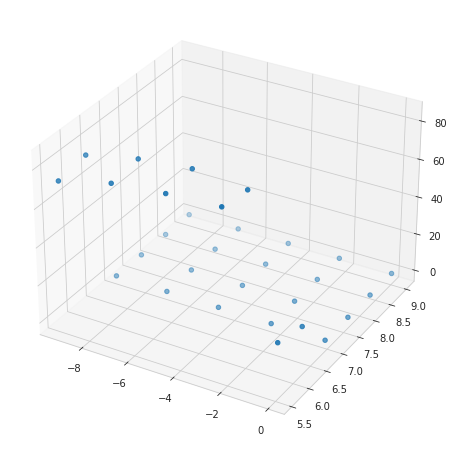

In [20]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.scatter(np.log(X), np.log(Y), Z)


In [22]:
import pickle
with open('plots/results.pkl', 'wb') as f:
    pickle.dump(data, f)